# 1. Business understanding
---

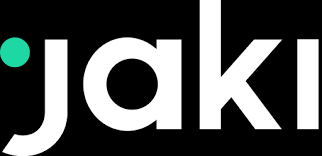

Jaki is a akronim for Jakarta Kini and it is a digital ecosystem committed to creating sustainable public service systems since 2019. As a part of Jakarta Smart City, JAKI goal is to #MakeEverythingEasy by making everything more efficient and effective. This means simplifying public services and daily activities for the citizens of Jakarta.

JAKI is an app developed by the Jakarta Government in Indonesia. As government-run apps can sometimes have shortcomings, I aim to investigate and analyze the user sentiments expressed in the JAKI reviews section on the Google Play Store. My goal is to create a system that can predict sentiment trends based on these reviews.


## 1.1 Objective
---
- Predict customers emotion behind the reviews they gave on play store
    

## 1.2 Modelling Task
---

- in a purpose of transforming a sentence into numeric, this project will use Tfidf and Bag of Word approach.
- on build a machine to predict emotion, this project will use supervised classification method such as: Logistic Regression and SVM

# 2. Modelling Workflow
---
### 1. <font color='blue'> Importing Data to Python</font>
    * Data description, Importing data, Data spliting
### 2. <font color='blue'> Preprocessing:</font>
    * Missing values handling, outliers handling
### 3. <font color='blue'> Exploratory Data Analysis:</font>
    * Descriptive Statistics, Missing values checking, Outlier Checking, Data exploration, Future Selection
### 4. <font color='blue'> Modelling :</font>
    * Model Fitting, Evaluation

# 3. Load Data
---

In [1]:
# Import all package to use on this project
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import demoji
import emoji
import nltk
import string
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from googletrans import Translator
from langdetect import detect_langs

## Pre Processing

In [2]:
data = pd.read_pickle('test.pkl')

In [3]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
314,f37c6b2f-acf0-4b86-a3b3-8a658790fd5e,muhammad arief,https://play-lh.googleusercontent.com/a-/ALV-UjXlR9kWAIdvg8qqS4PpZ1rjMy3XUKq2mqqX6Genk64Nnes,Aplikasi inovatif besutan gub Anies emang keren hasil kolaborasi jadi mempermudah warga Jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat Indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,1.2.46,2022-12-30 10:09:13,"Hi, Kak muhammad arief. Terima kasih atas ulasannya. Kami akan terus berusaha untuk memberikan yang terbaik :) #IP",2022-12-30 10:47:51,1.2.46
315,b70443c4-b9cc-4e15-a3fb-cd691b878e0a,Anisah Utari,https://play-lh.googleusercontent.com/a-/ALV-UjVmZG5wWb1s4ccYYXRq_EFQkyxAYUUZXlklbc_fyYcIklU,"Begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu. Sudah 2 kali lapor, tidak juga ada tindaklanjut. Ini orang-orang, kerjanya gimana. Mana dibayar pakai uang pajak rakyat pula. Aduhhhh",1,1,1.2.43,2022-12-29 18:56:19,"Hi Kak Anisah Utar. Mohon untuk menyebutkan kesulitan yang dihadapi dengan menjelaskan kronologi masalah melalui email kami di dki@jakarta.go.id, Terima kasih telah menggunakan JAKI :) #IP",2022-12-30 10:45:22,1.2.43
316,8fa39dba-5363-464d-8411-f754c7ce7976,Heru Iswanto,https://play-lh.googleusercontent.com/a-/ALV-UjV7B11aqYWCb9jo81aNiWtXsX-ltbqs3CuktCT7bzMFCAA,Kenapa mau cek pajak kendaraan tidak bisa,5,1,1.2.56,2022-12-29 13:04:20,"Hi Kak Heru Iswanto. Mohon untuk menyebutkan kesulitan yang dihadapi dengan menjelaskan kronologi masalah melalui email kami di dki@jakarta.go.id, Terima kasih telah menggunakan JAKI :) #IP",2022-12-30 10:42:19,1.2.56
317,7b018f57-cadd-4b86-9191-96caf72b5e88,Arif Rakhman,https://play-lh.googleusercontent.com/a-/ALV-UjUNrEhTohiD9oR01SRfRYNPn-4vz9b2Bw3Cw8b5VMvG1NFJ,Keren dah ah,5,1,None,2022-12-28 16:32:23,"Hi, Kak Arif Rakhman. Terima kasih atas ulasannya. Kami akan terus berusaha untuk memberikan yang terbaik :) #IP",2022-12-30 10:41:48,None
318,1163af45-286a-495a-ae20-21bec6967803,MDR IDN,https://play-lh.googleusercontent.com/a-/ALV-UjXo9ZXef0ltLUe4zWHviniRLWmKv7SG7sMeu24QC4li8kg,Sampah !! AUTO UNINSTALL,1,1,1.2.56,2022-12-28 08:19:11,None,NaT,1.2.56
...,...,...,...,...,...,...,...,...,...,...,...
1044,02e13f65-6d77-4ae1-aca0-3ef2ffa5e68b,Jandrylus 4,https://play-lh.googleusercontent.com/a-/ALV-UjWOaZeIR4b6X5KFxvHPj82yN3r4ktvprorp2lD6pTpXLEY,Scan barcode kolaborasi peduliLindungi tidak bisa digunakan untuk versi terbaru di perangkat Xiaomi reddmi 4 prime padahal scan langsung aplikasi lain yg berkolaborasi dengan peduli Lindungi bisa..... Tolong tindak lanjut kalo saya uninstall aja kalo gak bisa dipakai !!!!,1,21,1.2.38,2022-01-04 19:16:13,"Hi kak, mohon maaf atas ketidaknyamanannya. Mohon untuk menyebutkan kesulitan yang dihadapi dengan menjelaskan kronologi masalah melalui email kami di dki@jakarta.go.id, Terima kasih telah menggunakan JAKI :) #FA",2022-01-10 11:16:45,1.2.38
1045,e38efaf7-f2b8-4750-90aa-3e923137006e,raihan asyam,https://play-lh.googleusercontent.com/a-/ALV-UjXNFBu5I8KKUYMLFD-pxXXx_7NtnnJLkcOQYPv8Sfw1Wg,Saya mau booking lapangan badminton di GOR badminton melalu jaki tapi Gaada tulisan booking sewaktu di pilihan GOR nya,1,0,1.2.38,2022-01-04 15:43:20,"Hi kak, mohon maaf atas ketidaknyamanannya. Mohon untuk menyebutkan kesulitan yang dihadapi dengan menjelaskan kronologi masalah melalui email kami di dki@jakarta.go.id, Terima kasih telah menggunakan JAKI :) #AHL",2022-01-10 11:18:26,1.2.38
1046,548891a5-df3d-4141-80c9-4de29bc9add7,Rhizal Solid,https://play-lh.googleusercontent.com/a/ACg8ocI8uHB2mjxuDkeoamIkPHrrsyR_DdMVbUM09rCXsjQo=mo,Udah download..mau booking lapangan cuma bisa di lihat..menu booking tau dimana..membingungkan,2,1,1.2.38,2022-01-04 13:10:42,"Hi kak, mohon maaf atas ketidaknyamanannya. Mohon untuk menyebutkan kesulitan yang dihadapi dengan menjelaskan kronologi masalah m

In [4]:
data.info() #look for data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 314 to 1048
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              735 non-null    object        
 1   userName              735 non-null    object        
 2   userImage             735 non-null    object        
 3   content               735 non-null    object        
 4   score                 735 non-null    int64         
 5   thumbsUpCount         735 non-null    int64         
 6   reviewCreatedVersion  577 non-null    object        
 7   at                    735 non-null    datetime64[ns]
 8   replyContent          673 non-null    object        
 9   repliedAt             673 non-null    datetime64[ns]
 10  appVersion            577 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 68.9+ KB


In [5]:
#explore the first 10 row of data
data.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
314,f37c6b2f-acf0-4b86-a3b3-8a658790fd5e,muhammad arief,https://play-lh.googleusercontent.com/a-/ALV-UjXlR9kWAIdvg8qqS4PpZ1rjMy3XUKq2mqqX6Genk64Nnes,Aplikasi inovatif besutan gub Anies emang keren hasil kolaborasi jadi mempermudah warga Jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat Indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,1.2.46,2022-12-30 10:09:13,"Hi, Kak muhammad arief. Terima kasih atas ulasannya. Kami akan terus berusaha untuk memberikan yang terbaik :) #IP",2022-12-30 10:47:51,1.2.46
315,b70443c4-b9cc-4e15-a3fb-cd691b878e0a,Anisah Utari,https://play-lh.googleusercontent.com/a-/ALV-UjVmZG5wWb1s4ccYYXRq_EFQkyxAYUUZXlklbc_fyYcIklU,"Begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu. Sudah 2 kali lapor, tidak juga ada tindaklanjut. Ini orang-orang, kerjanya gimana. Mana dibayar pakai uang pajak rakyat pula. Aduhhhh",1,1,1.2.43,2022-12-29 18:56:19,"Hi Kak Anisah Utar. Mohon untuk menyebutkan kesulitan yang dihadapi dengan menjelaskan kronologi masalah melalui email kami di dki@jakarta.go.id, Terima kasih telah menggunakan JAKI :) #IP",2022-12-30 10:45:22,1.2.43
316,8fa39dba-5363-464d-8411-f754c7ce7976,Heru Iswanto,https://play-lh.googleusercontent.com/a-/ALV-UjV7B11aqYWCb9jo81aNiWtXsX-ltbqs3CuktCT7bzMFCAA,Kenapa mau cek pajak kendaraan tidak bisa,5,1,1.2.56,2022-12-29 13:04:20,"Hi Kak Heru Iswanto. Mohon untuk menyebutkan kesulitan yang dihadapi dengan menjelaskan kronologi masalah melalui email kami di dki@jakarta.go.id, Terima kasih telah menggunakan JAKI :) #IP",2022-12-30 10:42:19,1.2.56
317,7b018f57-cadd-4b86-9191-96caf72b5e88,Arif Rakhman,https://play-lh.googleusercontent.com/a-/ALV-UjUNrEhTohiD9oR01SRfRYNPn-4vz9b2Bw3Cw8b5VMvG1NFJ,Keren dah ah,5,1,None,2022-12-28 16:32:23,"Hi, Kak Arif Rakhman. Terima kasih atas ulasannya. Kami akan terus berusaha untuk memberikan yang terbaik :) #IP",2022-12-30 10:41:48,None
318,1163af45-286a-495a-ae20-21bec6967803,MDR IDN,https://play-lh.googleusercontent.com/a-/ALV-UjXo9ZXef0ltLUe4zWHviniRLWmKv7SG7sMeu24QC4li8kg,Sampah !! AUTO UNINSTALL,1,1,1.2.56,2022-12-28 08:19:11,None,NaT,1.2.56
319,50b69030-2554-4813-9ca2-98d3752bbee7,Hidayatul Mukhlisin,https://play-lh.googleusercontent.com/a-/ALV-UjWwqwSG4YUCd-WTiREN6oWApVV0cHkI6pnTayainp4yNkA,Fast respons 👍,5,0,1.2.56,2022-12-27 18:33:33,"Hi, Kak Hidayatul Mukhlisin. Terima kasih atas ulasannya. Kami akan terus berusaha untuk memberikan yang terbaik :) #TA",2022-12-28 09:14:58,1.2.56
320,fe4770a3-03b1-4bbb-9df4-686990a5e796,Rohadi rohmani,https://play-lh.googleusercontent.com/a/ACg8ocL98d6aPsGEUZDn8RMN09qPWaOAMY5BP_bQU92tr6d6=mo,Ok,5,0,1.2.55,2022-12-27 16:52:54,"Hi, Kak Rohadi Rohmani. Terima kasih atas ulasannya. Kami akan terus berusaha untuk memberikan yang terbaik :) #TA",2022-12-28 09:06:24,1.2.55
321,1ce5e97e-56a7-4a71-8a09-124c5494456f,Ilham Fajar putra,https://play-lh.googleusercontent.com/a-/ALV-UjXrCrs0LV_xmnGMzUfJde4VHT4WSet0N6B5R7efmIVAPg,"Provinsi dan pulau yang paling ramai di Indonesia adalah? Pulau= Jawa Provinsi= DKI JAKARTA, BANTEN, DIY YOGYAKARTA, JAWA BARAT, JAWA TENGAH, JAWA TIMUR. Bangga tinggal di pulau JAWA & BALI Jawa terkenal karena kesuburan nya dan padat penduduknya. Bali terkenal karena khas, kebudayaan, dan kehiburannyah",1,1,None,2022-12-26 08:20:40,"Hi Kak Ilham Fajar Putra. Mohon untuk menyebutkan kesulitan yang dihadapi dengan menjelaskan kronologi masalah melalui email kami di dki@jakarta.go.id, Terima kasih telah menggunakan JAKI :) #TA",2022-12-27 10:17:51,None
322,9002baf2-f38c-4f1c-8d37-6f71d30db0cb,Azzahra choirunnisa R.,https://play-lh.googleusercontent.com/a-/ALV-UjXplmObjh8IGH4WSe6yMATE1PbgDmoSBOGLvPKFdDuUWhg,Mau daftr akun di jaki buat ke taman tebet kenapa tidak masuk buat akun Email saya,1,1,1.2.56,2022-12-25 11:19:19,"Hai, Kak Azzahra choirunnisa R

In [6]:
#Slicing data and keep some columns to analyze
data_use = data[['userName','content','score','thumbsUpCount','at']]
data_use.head().reset_index(inplace=True)

## Cleaning

In [7]:
# Check data type
# Convert 'at' column from string type into datetime
data_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 314 to 1048
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   userName       735 non-null    object        
 1   content        735 non-null    object        
 2   score          735 non-null    int64         
 3   thumbsUpCount  735 non-null    int64         
 4   at             735 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 34.5+ KB


In [8]:
data_use.reset_index(inplace=True)

In [9]:
# transform 'at' columns whic contains date to dattime format
data_use['at']=pd.to_datetime(data_use['at'])
data_use['at']

0     2022-12-30 10:09:13
1     2022-12-29 18:56:19
2     2022-12-29 13:04:20
3     2022-12-28 16:32:23
4     2022-12-28 08:19:11
              ...        
730   2022-01-04 19:16:13
731   2022-01-04 15:43:20
732   2022-01-04 13:10:42
733   2022-01-01 16:22:24
734   2022-01-01 07:00:08
Name: at, Length: 735, dtype: datetime64[ns]

### 1. Case Folding

In [10]:
def case_folding(source,text):
    """
    source: Data Frame
    text: Column in Data Frame
    -------
    This function cleanses text data with a case-folding based approach.
    """
    # Demojize and convert to lowercase
    content = pd.Series(source[text]).apply(lambda x: emoji.demojize(x,language='id'))
    source[text]=content
    source[text]=source[text].str.lower()
    
    # Remove non-alphanumeric characters
    source[text]=source[text].str.replace(r'[^\w\s]+',' ', regex=True)
    
    # Strip leading and trailing spaces
    source[text]=source[text].str.strip()
    
    # Replace underscores with spaces
    source[text]=source[text].str.replace('_',' ')

In [11]:
# run the function
case_folding(data_use,'content')
data_use

,index,userName,content,score,thumbsUpCount,at
0,314,muhammad arief,aplikasi inovatif besutan gub anies emang keren hasil kolaborasi jadi mempermudah warga jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,2022-12-30 10:09:13
1,315,Anisah Utari,begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu sudah 2 kali lapor tidak juga ada tindaklanjut ini orang orang kerjanya gimana mana dibayar pakai uang pajak rakyat pula aduhhhh,1,1,2022-12-29 18:56:19
2,316,Heru Iswanto,kenapa mau cek pajak kendaraan tidak bisa,5,1,2022-12-29 13:04:20
3,317,Arif Rakhman,keren dah ah,5,1,2022-12-28 16:32:23
4,318,MDR IDN,sampah auto uninstall,1,1,2022-12-28 08:19:11
...,...,...,...,...,...,...
730,1044,Jandrylus 4,scan barcode kolaborasi pedulilindungi tidak bisa digunakan untuk versi terbaru di perangkat xiaomi reddmi 4 prime padahal scan langsung aplikasi lain yg berkolaborasi dengan peduli lindungi bisa tolong tindak lanjut kalo saya uninstall aja kalo gak bisa dipakai,1,21,2022-01-04 19:16:13
731,1045,raihan asyam,saya mau booking lapangan badminton di gor badminton melalu jaki tapi gaada tulisan booking sewaktu di pilihan gor nya,1,0,2022-01-04 15:43:20
732,1046,Rhizal Solid,udah download mau booking lapangan cuma bisa di lihat menu booking tau dimana membingungkan,2,1,2022-01-04 13:10:42
733,1047,Mohamad Taufik Baletty,fitur check in check out yang berkolaborasi dengan pedulilindungi tidak bisa digunakan saat saya menggunakan layanan transjakarta dan mengunjungi perpustakaan nasional mohon disediakan pula fitur live chat di aplikasi jaki agar warga dki jakarta bisa bertanya dan mendapat respon lebih cepat tentang beragam hal terkait kotanya,5,35,2022-01-01 16:22:24


### 2. Tokenize


In [12]:
# split the sentence into word for futher analysis
split =[]
for x in data_use['content']:
    split.append(x.split())
data_use['token']=split

data_use

,index,userName,content,score,thumbsUpCount,at,token
0,314,muhammad arief,aplikasi inovatif besutan gub anies emang keren hasil kolaborasi jadi mempermudah warga jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,2022-12-30 10:09:13,"[aplikasi, inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, jadi, mempermudah, warga, jakarta, berkomunikasi, kepada, pemerintah, provinsi, permasalahannya, saya, harap, 2024, aplikasinya, diangkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, melaporkan, masalah, di, daerahnya]"
1,315,Anisah Utari,begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu sudah 2 kali lapor tidak juga ada tindaklanjut ini orang orang kerjanya gimana mana dibayar pakai uang pajak rakyat pula aduhhhh,1,1,2022-12-29 18:56:19,"[begitu, lelah, pelaporan, terkait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerjanya, gimana, mana, dibayar, pakai, uang, pajak, rakyat, pula, aduhhhh]"
2,316,Heru Iswanto,kenapa mau cek pajak kendaraan tidak bisa,5,1,2022-12-29 13:04:20,"[kenapa, mau, cek, pajak, kendaraan, tidak, bisa]"
3,317,Arif Rakhman,keren dah ah,5,1,2022-12-28 16:32:23,"[keren, dah, ah]"
4,318,MDR IDN,sampah auto uninstall,1,1,2022-12-28 08:19:11,"[sampah, auto, uninstall]"
...,...,...,...,...,...,...,...
730,1044,Jandrylus 4,scan barcode kolaborasi pedulilindungi tidak bisa digunakan untuk versi terbaru di perangkat xiaomi reddmi 4 prime padahal scan langsung aplikasi lain yg berkolaborasi dengan peduli lindungi bisa tolong tindak lanjut kalo saya uninstall aja kalo gak bisa dipakai,1,21,2022-01-04 19:16:13,"[scan, barcode, kolaborasi, pedulilindungi, tidak, bisa, digunakan, untuk, versi, terbaru, di, perangkat, xiaomi, reddmi, 4, prime, padahal, scan, langsung, aplikasi, lain, yg, berkolaborasi, dengan, peduli, lindungi, bisa, tolong, tindak, lanjut, kalo, saya, uninstall, aja, kalo, gak, bisa, dipakai]"
731,1045,raihan asyam,saya mau booking lapangan badminton di gor badminton melalu jaki tapi gaada tulisan booking sewaktu di pilihan gor nya,1,0,2022-01-04 15:43:20,"[saya, mau, booking, lapangan, badminton, di, gor, badminton, melalu, jaki, tapi, gaada, tulisan, booking, sewaktu, di, pilihan, gor, nya]"
732,1046,Rhizal Solid,udah download mau booking lapangan cuma bisa di lihat menu booking tau dimana membingungkan,2,1,2022-01-04 13:10:42,"[udah, download, mau, booking, lapangan, cuma, bisa, di, lihat, menu, booking, tau, dimana, membingungkan]"
733,1047,Mohamad Taufik Baletty,fitur check in check out yang berkolaborasi dengan pedulilindungi tidak bisa digunakan saat saya menggunakan layanan transjakarta dan mengunjungi perpustakaan nasional mohon disediakan pula fitur live chat di aplikasi jaki agar warga dki jakarta bisa bertanya dan mendapat respon lebih cepat tentang beragam hal terkait kotanya,5,35,2022-01-01 16:22:24,"[fitur, check, in, check, out, yang, berkolaborasi, dengan, pedulilindungi, tidak, bisa, digunakan, saat, saya, menggunakan, layanan, transjakarta, dan, mengunjungi, perpustakaan, nasional, mohon, disediakan, pula, fitur, live, chat, di, aplikasi, jaki, agar, warga, dki, jakarta, bisa, bertanya, dan, mendapat, respon, lebih, cepat, tentang, beragam, hal, terkait, kotanya]"


### 3. Steming

In [13]:
data_use['token'][1][1]

'lelah'

In [14]:
# store a keyword for stem the word
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [15]:
# stem each word and transform it into root word
data_use['stem'] = data_use['token'].apply(lambda x:[stemmer.stem(y)for y in x])
data_use.head(10)

,index,userName,content,score,thumbsUpCount,at,token,stem
0,314,muhammad arief,aplikasi inovatif besutan gub anies emang keren hasil kolaborasi jadi mempermudah warga jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,2022-12-30 10:09:13,"[aplikasi, inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, jadi, mempermudah, warga, jakarta, berkomunikasi, kepada, pemerintah, provinsi, permasalahannya, saya, harap, 2024, aplikasinya, diangkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, melaporkan, masalah, di, daerahnya]","[aplikasi, inovatif, besut, gub, anies, emang, keren, hasil, kolaborasi, jadi, mudah, warga, jakarta, komunikasi, kepada, perintah, provinsi, masalah, saya, harap, 2024, aplikasi, angkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, lapor, masalah, di, daerah]"
1,315,Anisah Utari,begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu sudah 2 kali lapor tidak juga ada tindaklanjut ini orang orang kerjanya gimana mana dibayar pakai uang pajak rakyat pula aduhhhh,1,1,2022-12-29 18:56:19,"[begitu, lelah, pelaporan, terkait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerjanya, gimana, mana, dibayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[begitu, lelah, lapor, kait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerja, gimana, mana, bayar, pakai, uang, pajak, rakyat, pula, aduhhhh]"
2,316,Heru Iswanto,kenapa mau cek pajak kendaraan tidak bisa,5,1,2022-12-29 13:04:20,"[kenapa, mau, cek, pajak, kendaraan, tidak, bisa]","[kenapa, mau, cek, pajak, kendara, tidak, bisa]"
3,317,Arif Rakhman,keren dah ah,5,1,2022-12-28 16:32:23,"[keren, dah, ah]","[keren, dah, ah]"
4,318,MDR IDN,sampah auto uninstall,1,1,2022-12-28 08:19:11,"[sampah, auto, uninstall]","[sampah, auto, uninstall]"
5,319,Hidayatul Mukhlisin,fast respons jempol ke atas,5,0,2022-12-27 18:33:33,"[fast, respons, jempol, ke, atas]","[fast, respons, jempol, ke, atas]"
6,320,Rohadi rohmani,ok,5,0,2022-12-27 16:52:54,[ok],[ok]
7,321,Ilham Fajar putra,provinsi dan pulau yang paling ramai di indonesia adalah pulau jawa provinsi dki jakarta banten diy yogyakarta jawa barat jawa tengah jawa timur bangga tinggal di pulau jawa bali jawa terkenal karena kesuburan nya dan padat penduduknya bali terkenal karena khas kebudayaan dan kehiburannyah,1,1,2022-12-26 08:20:40,"[provinsi, dan, pulau, yang, paling, ramai, di, indonesia, adalah, pulau, jawa, provinsi, dki, jakarta, banten, diy, yogyakarta, jawa, barat, jawa, tengah, jawa, timur, bangga, tinggal, di, pulau, jawa, bali, jawa, terkenal, karena, kesuburan, nya, dan, padat, penduduknya, bali, terkenal, karena, khas, kebudayaan, dan, kehiburannyah]","[provinsi, dan, pulau, yang, paling, ramai, di, indonesia, adalah, pulau, jawa, provinsi, dki, jakarta, banten, diy, yogyakarta, jawa, barat, jawa, tengah, jawa, timur, bangga, tinggal, di, pulau, jawa, bal, jawa, kenal, karena, subur, nya, dan, padat, duduk, bal, kenal, karena, khas, budaya, dan, kehiburannyah]"
8,322,Azzahra choirunnisa R.,mau daftr akun di jaki buat ke taman tebet kenapa tidak masuk buat akun email saya,1,1,2022-12-25 11:19:19,"[mau, daftr, akun, di, jaki, buat, ke, taman, tebet, kenapa, tidak, masuk, buat, akun, email, saya]","[mau, daftr, akun, di, jaki, buat, ke, taman, tebet, kenapa, tidak, masuk, buat, akun, email, saya]"
9,323,Bu Marsiti,aplikasinya terlalu bagus sampe susah di gunakan nya daftar nik alpukat gagal mulu hadeh gaptek nih,4,1,2022-12-24 12:28:05,"[aplikasinya, terlalu, bagus, sampe, susah, di, gunakan, nya, daftar, nik, alpukat, gagal, mulu, hadeh, gaptek, nih]","[aplikasi, terlalu, bagus, sampe, susah, di, guna, nya, daftar, nik, alpukat, gagal, mu

### 3. Stop Words

In [16]:
#add indonesian stopwords from sastrawi package
listsw = stopwords.words('indonesian')
#extend some stopwords that's doesnt appear on sastrawi package
listsw.extend(['yg','dan','ke','ga','gak','','pas','di','nya','ya','itu','lagi','ini','aja','aplikasi','update','ga',"''"])

#create a function to erase the sropwords
def filter_stopwords(word_list):
    return [word for word in word_list if word not in listsw]

# Apply the function to the 'token_stemming' column
data_use['stopwords_remove'] = data_use['token'].apply(filter_stopwords)
data_use.head(10)

,index,userName,content,score,thumbsUpCount,at,token,stem,stopwords_remove
0,314,muhammad arief,aplikasi inovatif besutan gub anies emang keren hasil kolaborasi jadi mempermudah warga jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,2022-12-30 10:09:13,"[aplikasi, inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, jadi, mempermudah, warga, jakarta, berkomunikasi, kepada, pemerintah, provinsi, permasalahannya, saya, harap, 2024, aplikasinya, diangkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, melaporkan, masalah, di, daerahnya]","[aplikasi, inovatif, besut, gub, anies, emang, keren, hasil, kolaborasi, jadi, mudah, warga, jakarta, komunikasi, kepada, perintah, provinsi, masalah, saya, harap, 2024, aplikasi, angkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, lapor, masalah, di, daerah]","[inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, mempermudah, warga, jakarta, berkomunikasi, pemerintah, provinsi, permasalahannya, harap, 2024, aplikasinya, diangkat, tingkat, nasional, rakyat, indonesia, mudah, melaporkan, daerahnya]"
1,315,Anisah Utari,begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu sudah 2 kali lapor tidak juga ada tindaklanjut ini orang orang kerjanya gimana mana dibayar pakai uang pajak rakyat pula aduhhhh,1,1,2022-12-29 18:56:19,"[begitu, lelah, pelaporan, terkait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerjanya, gimana, mana, dibayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[begitu, lelah, lapor, kait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerja, gimana, mana, bayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[lelah, pelaporan, terkait, lampu, jalan, mati, 1, minggu, 2, kali, lapor, tindaklanjut, orang, orang, kerjanya, gimana, dibayar, pakai, uang, pajak, rakyat, aduhhhh]"
2,316,Heru Iswanto,kenapa mau cek pajak kendaraan tidak bisa,5,1,2022-12-29 13:04:20,"[kenapa, mau, cek, pajak, kendaraan, tidak, bisa]","[kenapa, mau, cek, pajak, kendara, tidak, bisa]","[cek, pajak, kendaraan]"
3,317,Arif Rakhman,keren dah ah,5,1,2022-12-28 16:32:23,"[keren, dah, ah]","[keren, dah, ah]","[keren, dah, ah]"
4,318,MDR IDN,sampah auto uninstall,1,1,2022-12-28 08:19:11,"[sampah, auto, uninstall]","[sampah, auto, uninstall]","[sampah, auto, uninstall]"
5,319,Hidayatul Mukhlisin,fast respons jempol ke atas,5,0,2022-12-27 18:33:33,"[fast, respons, jempol, ke, atas]","[fast, respons, jempol, ke, atas]","[fast, respons, jempol]"
6,320,Rohadi rohmani,ok,5,0,2022-12-27 16:52:54,[ok],[ok],[ok]
7,321,Ilham Fajar putra,provinsi dan pulau yang paling ramai di indonesia adalah pulau jawa provinsi dki jakarta banten diy yogyakarta jawa barat jawa tengah jawa timur bangga tinggal di pulau jawa bali jawa terkenal karena kesuburan nya dan padat penduduknya bali terkenal karena khas kebudayaan dan kehiburannyah,1,1,2022-12-26 08:20:40,"[provinsi, dan, pulau, yang, paling, ramai, di, indonesia, adalah, pulau, jawa, provinsi, dki, jakarta, banten, diy, yogyakarta, jawa, barat, jawa, tengah, jawa, timur, bangga, tinggal, di, pulau, jawa, bali, jawa, terkenal, karena, kesuburan, nya, dan, padat, penduduknya, bali, terkenal, karena, khas, kebudayaan, dan, kehiburannyah]","[provinsi, dan, pulau, yang, paling, ramai, di, indonesia, adalah, pulau, jawa, provinsi, dki, jakarta, banten, diy, yogyakarta, jawa, barat, jawa, tengah, jawa, timur, bangga, tinggal, di, pulau, jawa, bal, jawa, kenal, karena, subur, nya, dan, padat, duduk, bal, kenal, karena, khas, budaya, dan, kehiburannyah]","[provinsi, pulau, ramai, indonesia, pulau, jawa, provinsi, dki, jakarta, banten, diy, yogyakarta, jawa, barat, jawa, jawa, timur, bangga, tingg

### 5. Additional data for EDA



In [17]:
# add length of words 
data_use['content_len'] = data_use['content'].apply(len)

# add word count
data_use['word_count'] = data_use['content'].apply(lambda x:len(str(x).split()))

In [18]:
# add hourly time
data_use['time'] = data_use['at'].apply(lambda x:x.hour)
data_use.head(2)

,index,userName,content,score,thumbsUpCount,at,token,stem,stopwords_remove,content_len,word_count,time
0,314,muhammad arief,aplikasi inovatif besutan gub anies emang keren hasil kolaborasi jadi mempermudah warga jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,2022-12-30 10:09:13,"[aplikasi, inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, jadi, mempermudah, warga, jakarta, berkomunikasi, kepada, pemerintah, provinsi, permasalahannya, saya, harap, 2024, aplikasinya, diangkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, melaporkan, masalah, di, daerahnya]","[aplikasi, inovatif, besut, gub, anies, emang, keren, hasil, kolaborasi, jadi, mudah, warga, jakarta, komunikasi, kepada, perintah, provinsi, masalah, saya, harap, 2024, aplikasi, angkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, lapor, masalah, di, daerah]","[inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, mempermudah, warga, jakarta, berkomunikasi, pemerintah, provinsi, permasalahannya, harap, 2024, aplikasinya, diangkat, tingkat, nasional, rakyat, indonesia, mudah, melaporkan, daerahnya]",289,37,10
1,315,Anisah Utari,begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu sudah 2 kali lapor tidak juga ada tindaklanjut ini orang orang kerjanya gimana mana dibayar pakai uang pajak rakyat pula aduhhhh,1,1,2022-12-29 18:56:19,"[begitu, lelah, pelaporan, terkait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerjanya, gimana, mana, dibayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[begitu, lelah, lapor, kait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerja, gimana, mana, bayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[lelah, pelaporan, terkait, lampu, jalan, mati, 1, minggu, 2, kali, lapor, tindaklanjut, orang, orang, kerjanya, gimana, dibayar, pakai, uang, pajak, rakyat, aduhhhh]",203,32,18


In [19]:
# create a function to seperate 'PM' and 'AM' to determine the reviews are give on midnight or midday
def time(x):
    if x > 11:
        return 'PM'
    else:
        return 'AM'
# apply the function above   
data_use['pm/am']=data_use['time'].apply(time)

In [20]:
# data are all clear and save on local
data_use.to_csv('data_ready.csv')

## EDA

### Distribution

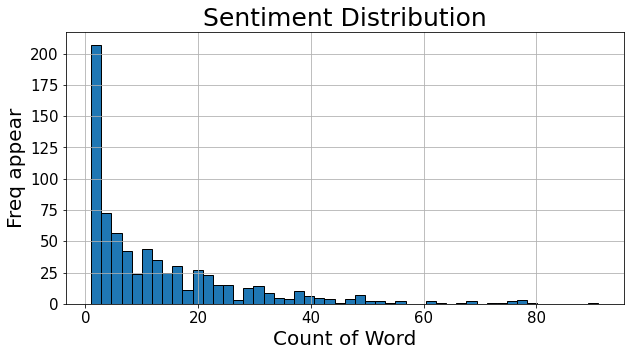

In [21]:
# the distribution of count letter
plt.figure(figsize=(10,5))
data_use['word_count'].plot(kind='hist',bins=50,ec='black')
plt.grid()
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.title('Sentiment Distribution',fontsize = 25)
plt.xlabel('Count of Word',fontsize=20)
plt.ylabel('Freq appear',fontsize=20); 

### Count of Word

From the graph above, we could describe a user most likely to give a short review with a word around 0 to 20 word.

-----

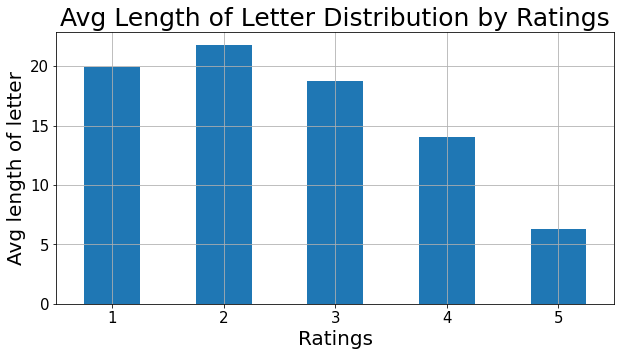

In [26]:
# length of sentence by ratings
plt.figure(figsize=(10,5))
data_use.groupby('score')['word_count'].mean().plot(kind='bar')
plt.grid()
plt.title('Avg word of Letter Distribution by Ratings',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Ratings',fontsize=20)
plt.ylabel('Avg length of letter',fontsize=20);

## Avg word per ratings

The ratings sccheme is a likert schale from 1 - 5, the bigger the number the greater the rating it is. We can conclude that ratings 1 & 2 are the lowest or negative, 3 is netral otherwise, 4 & 5 are the higest or positive.

From the data above, user most likely give a longer reviews when they want to give a negative ratings (1 & 2) and user tend to give a shorter reviews on positive ratings (4 & 5).


----

#### Thumbs Up

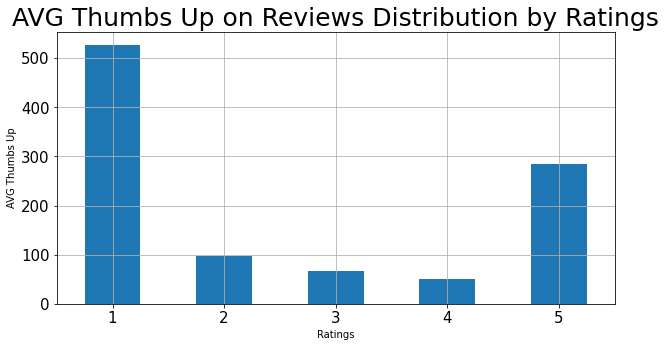

In [47]:
# distribution of total thumbs up
plt.figure(figsize=(10,5))
data_use.groupby('score')['thumbsUpCount'].sum().plot(kind='bar')
plt.grid()
plt.title('AVG Thumbs Up on Reviews Distribution by Ratings',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Ratings',fontsize=10)
plt.ylabel('AVG Thumbs Up',fontsize=10);

### Total thumbs up in every reviews

From the graph above, user tend to give a thumbs up to a review with negative sentiment (1 & 2) score, it is tell that a score 1 have so many thumbs up, above 500 thumbs up, follow by score 5 with a thumbs up for almost 300. It can tell that user most likely give more thumbs up to a most negative comment or most positive comment.

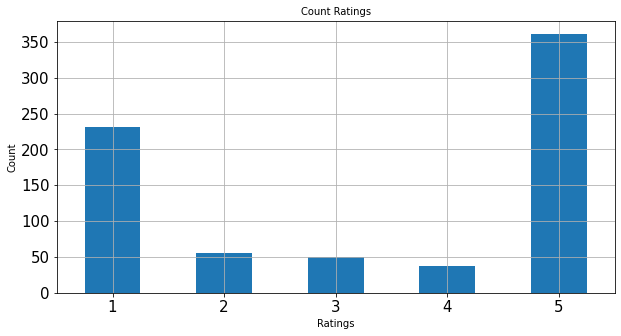

In [48]:
plt.figure(figsize=(10,5))
data_use.groupby('score')['score'].count().plot(kind='bar')
plt.grid()
plt.title('Count Ratings',fontsize = 10)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Ratings',fontsize=10)
plt.ylabel('Count',fontsize=10);

### Count of ratings give

in total, user are most likely to give positive review (Score number 5), it tell's that the app running well for the majority of user.

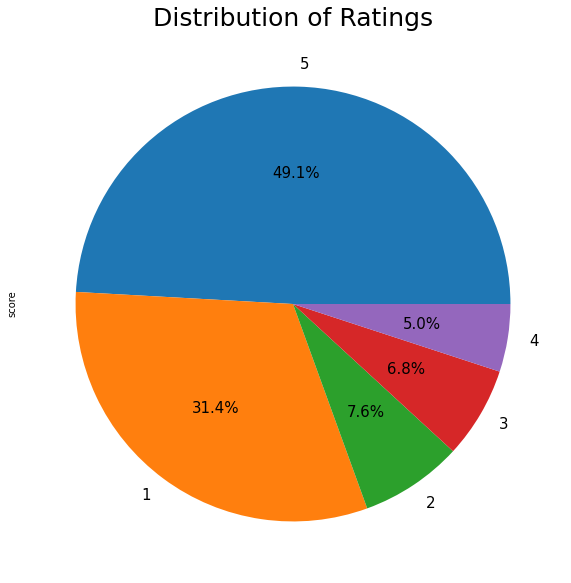

In [49]:
# percentage of rating distribute
data_use['score'].value_counts().plot(kind='pie',figsize=(10,10),autopct='%1.1f%%',fontsize=15)
plt.title('Distribution of Ratings',fontsize=25); 

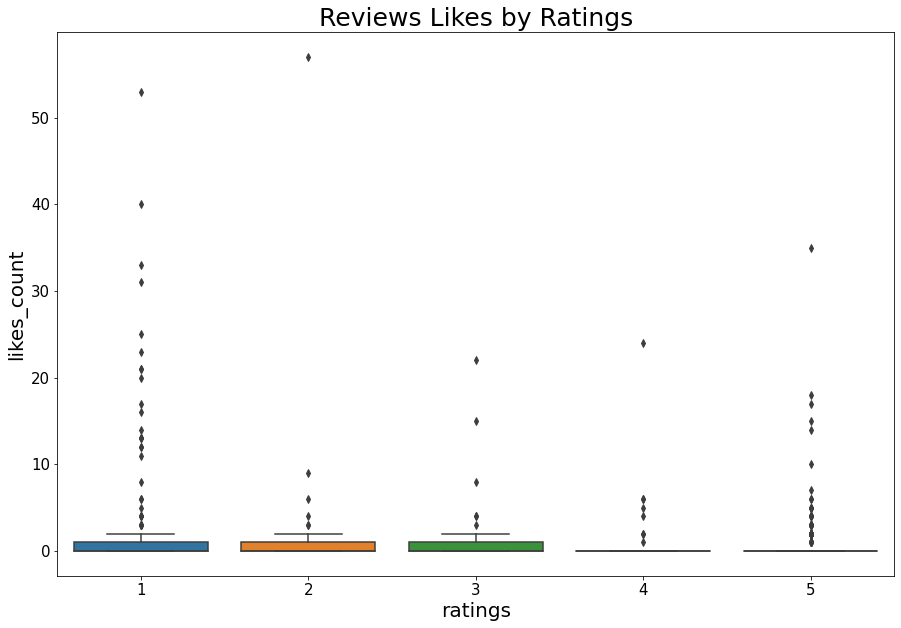

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_use,x='score',y='thumbsUpCount')
plt.title('Reviews Likes by Ratings',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('ratings',fontsize=20)
plt.ylabel('likes_count',fontsize=20);

## Checking Outliers data

#### Correlation

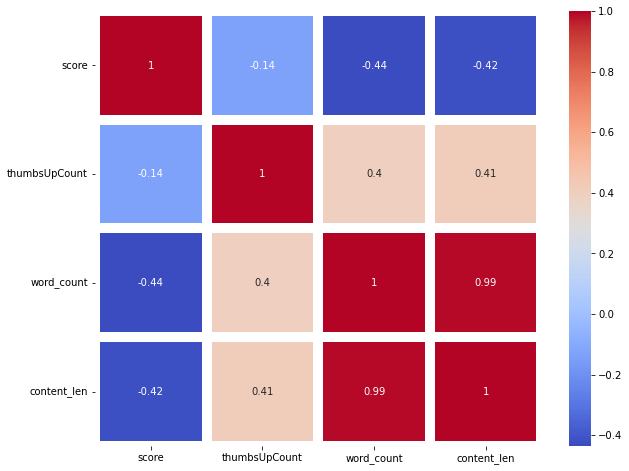

In [51]:
correlation = data_use[['score','thumbsUpCount','word_count','content_len']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,cmap='coolwarm',annot=True,linewidths=10)
plt.xticks(rotation=0,fontsize=10)
plt.yticks(rotation=0,fontsize=10);

#### Word Count

In [52]:
data_use['stopwords_remove'][1][1]

'pelaporan'

In [53]:
viz2= [item for sublist in data_use['stopwords_remove'] for item in sublist]

In [54]:
viz_positive= [item for sublist in data_use[(data_use['score']==5)|(data_use['score']==4)]['stopwords_remove'] for item in sublist]

In [55]:
viz_negative= [item for sublist in data_use[(data_use['score']==2)|(data_use['score']==1)]['stopwords_remove'] for item in sublist]

#### Word on Positive Review

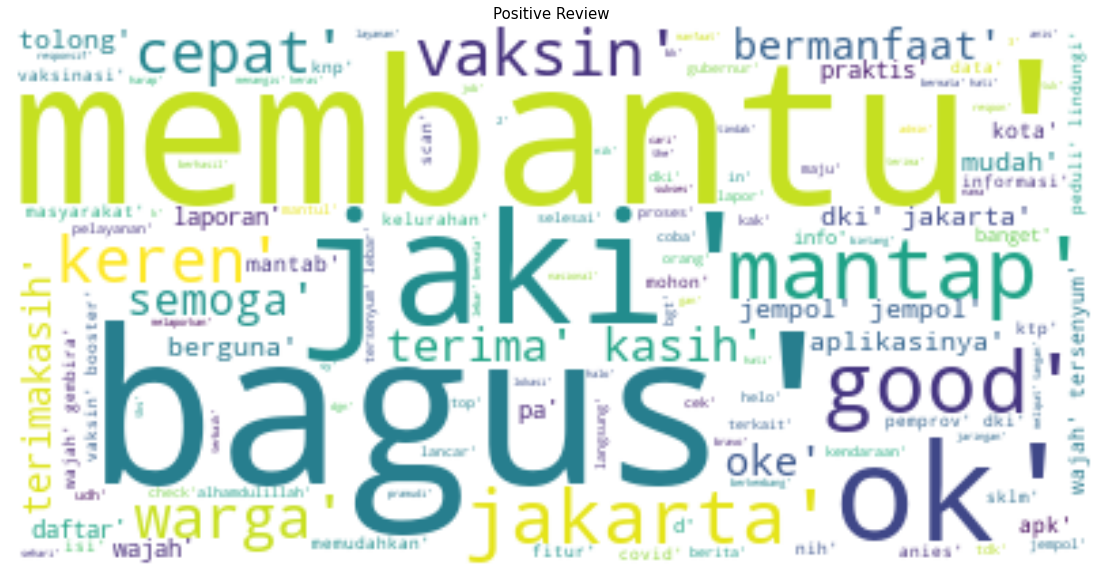

In [56]:
wc_postive = WordCloud(background_color='white').generate(str(viz_positive))
plt.figure(figsize=(20,10))
plt.imshow(wc_postive,interpolation='bilinear')
plt.axis('off')
plt.title('Positive Review',fontsize = 15)
plt.show();

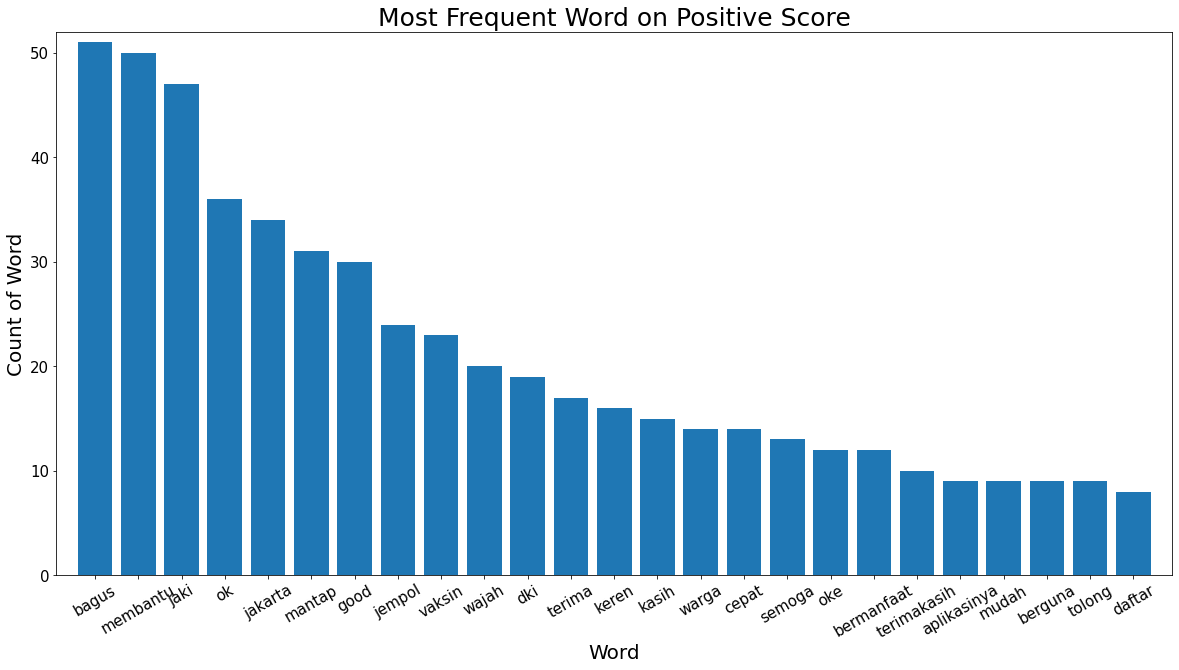

In [57]:
mc_pos=FreqDist(viz_positive).most_common(25)
a,b = zip(*mc_pos)
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.bar(a,b)
plt.title('Most Frequent Word on Positive Score',fontsize = 25)
plt.xticks(rotation=30,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Word',fontsize=20)
plt.ylabel('Count of Word',fontsize=20);
plt.show()

#### Negative Word

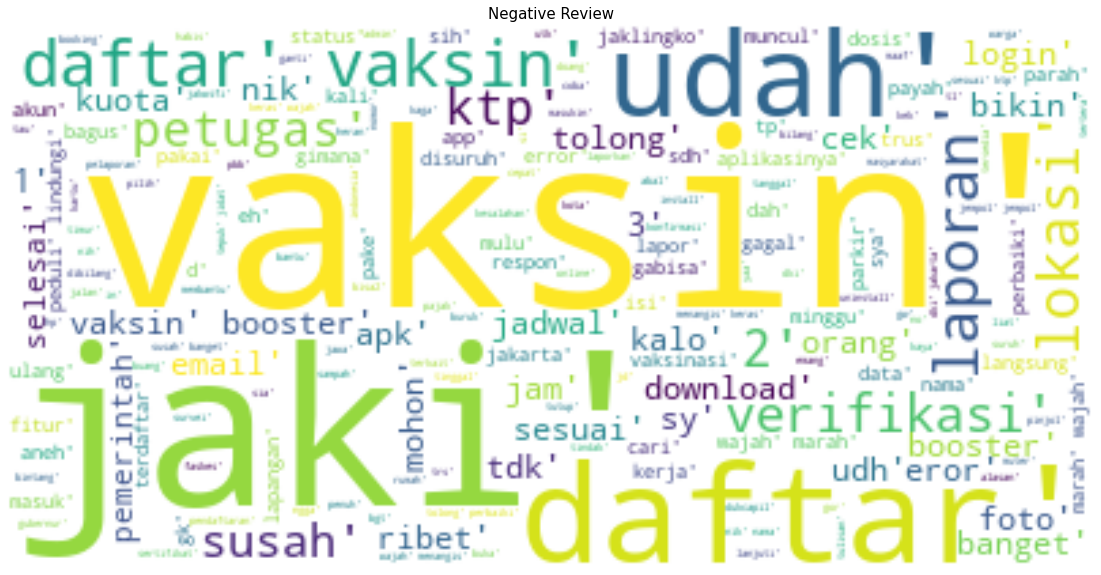

In [58]:
wc_negative = WordCloud(background_color='white').generate(str(viz_negative))
plt.figure(figsize=(20,10))
plt.imshow(wc_negative,interpolation='bilinear')
plt.axis('off')
plt.title('Negative Review',fontsize = 15)
plt.show();

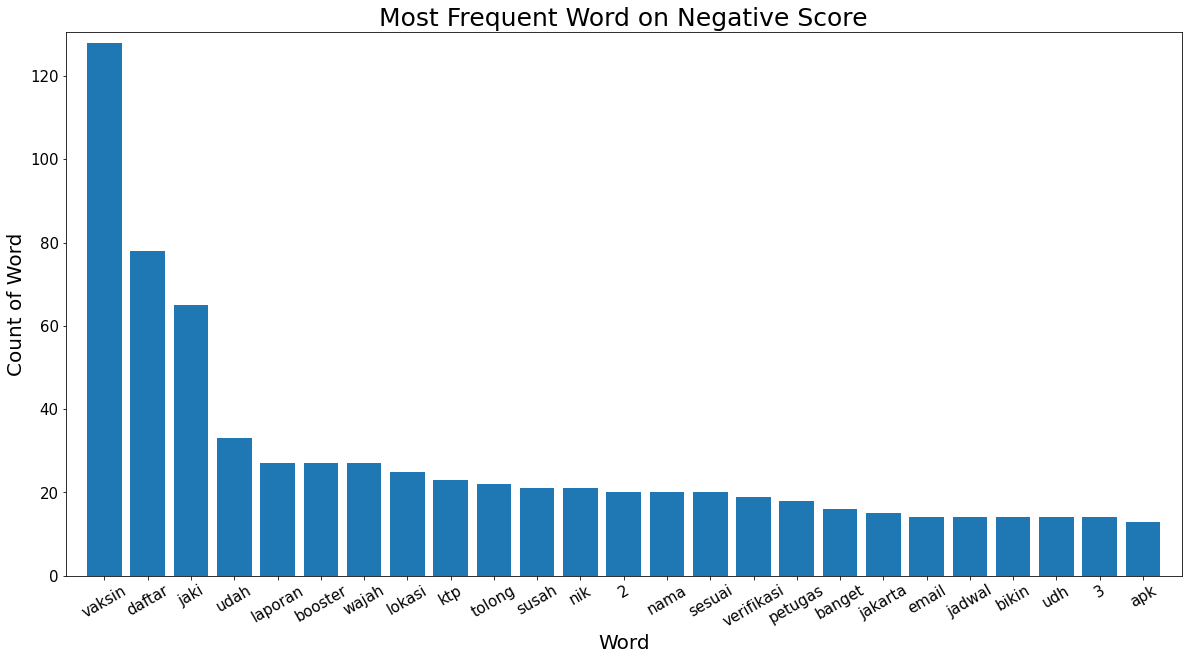

In [59]:
mc_neg=FreqDist(viz_negative).most_common(25)
c,d=zip(*mc_neg)
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.bar(c,d)
plt.title('Most Frequent Word on Negative Score',fontsize = 25)
plt.xticks(rotation=30,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Word',fontsize=20)
plt.ylabel('Count of Word',fontsize=20);
plt.show()

### All Sentiment

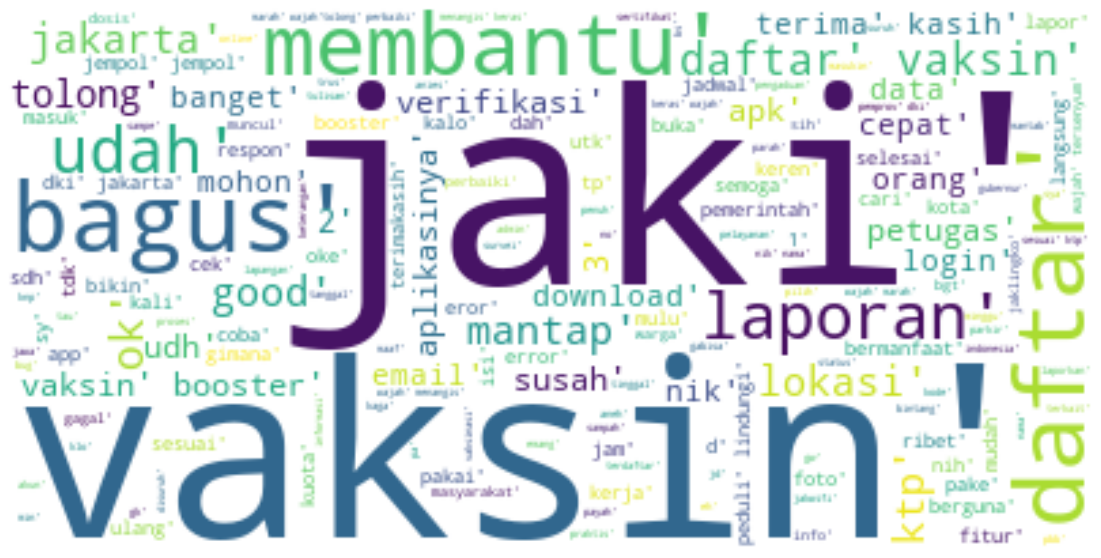

In [60]:
wc = WordCloud(background_color='white').generate(str(viz2))
plt.figure(figsize=(20,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

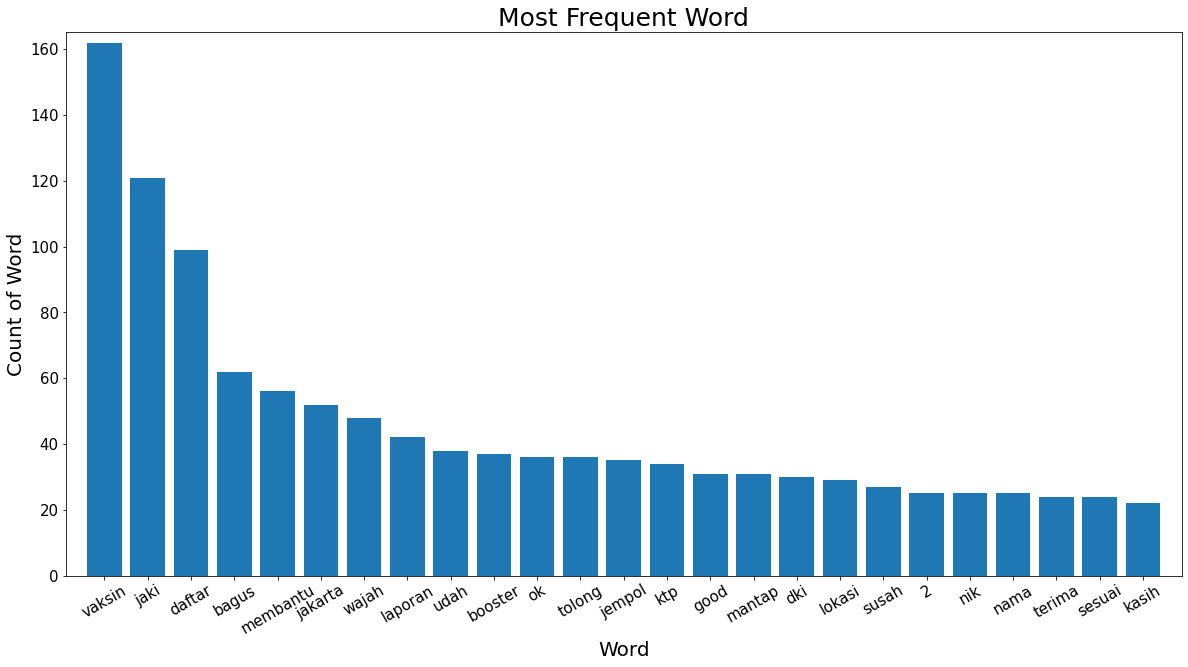

In [61]:
mc=FreqDist(viz2).most_common(25)
e,f = zip(*mc)

plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.bar(e,f)
plt.title('Most Frequent Word',fontsize = 25)
plt.xticks(rotation=30,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Word',fontsize=20)
plt.ylabel('Count of Word',fontsize=20);
plt.show()

#### Time Distribution

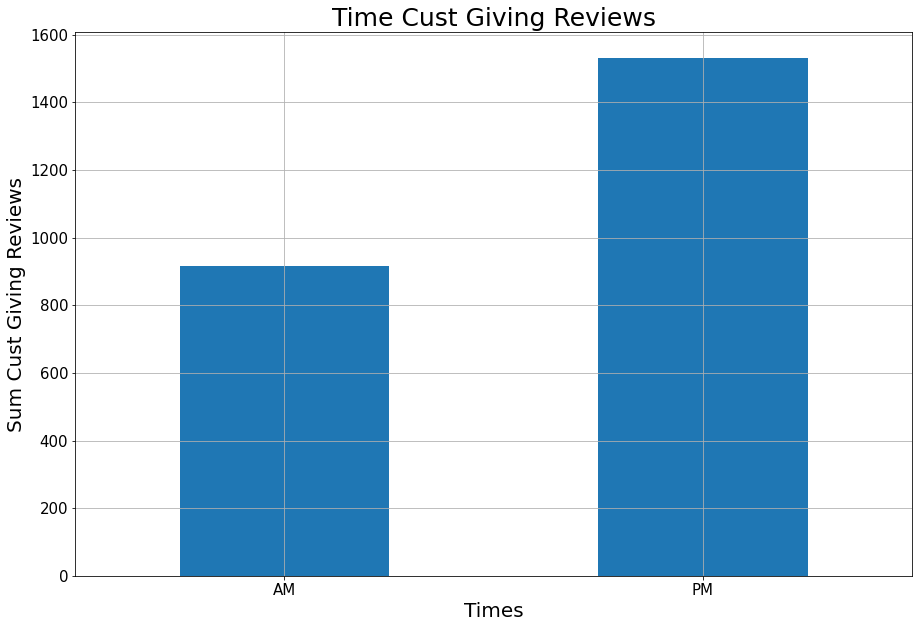

In [62]:
plt.figure(figsize=(15,10))
data_use.groupby('pm/am')['score'].sum().plot(kind='bar')
plt.grid()
plt.title('Time Cust Giving Reviews',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Times',fontsize=20)
plt.ylabel('Sum Cust Giving Reviews',fontsize=20);

In [63]:
data_use['at']

0     2022-12-30 10:09:13
1     2022-12-29 18:56:19
2     2022-12-29 13:04:20
3     2022-12-28 16:32:23
4     2022-12-28 08:19:11
              ...        
730   2022-01-04 19:16:13
731   2022-01-04 15:43:20
732   2022-01-04 13:10:42
733   2022-01-01 16:22:24
734   2022-01-01 07:00:08
Name: at, Length: 735, dtype: datetime64[ns]

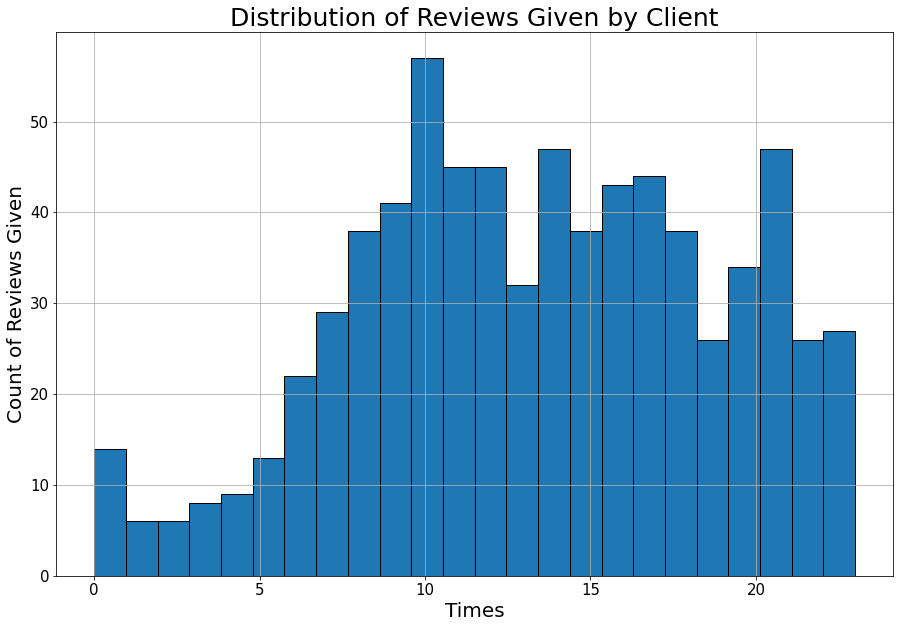

In [64]:
plt.figure(figsize=(15,10))
data_use['at'].dt.hour.plot(kind='hist',bins=24,ec='black')
plt.grid()
plt.title('Distribution of Reviews Given by Client',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Times',fontsize=20)
plt.ylabel('Count of Reviews Given',fontsize=20);

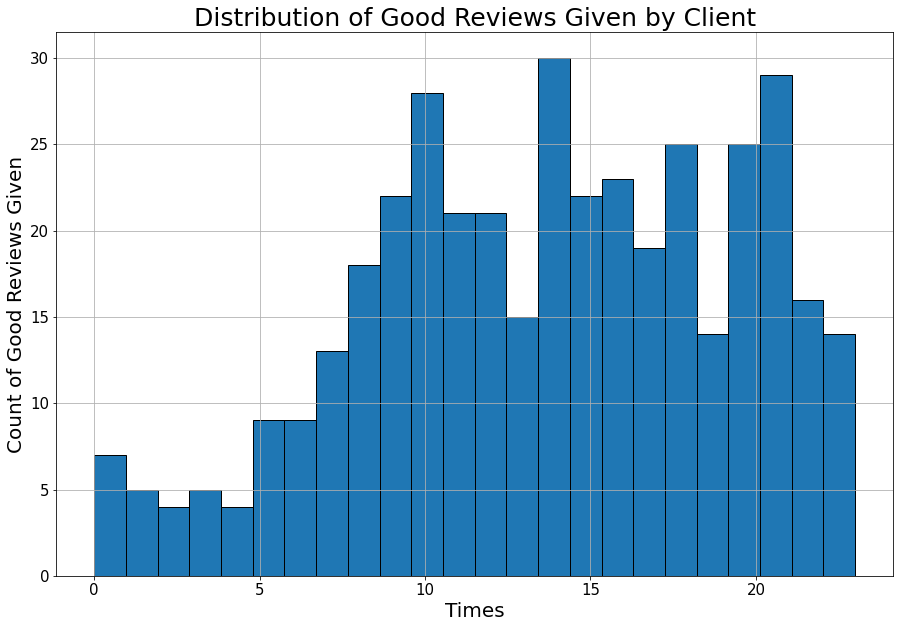

In [65]:
Positive = data_use[(data_use['score']==5)|(data_use['score']==4)]
plt.figure(figsize=(15,10))
Positive['at'].dt.hour.plot(kind='hist',bins=24,ec='black')
plt.grid()
plt.title('Distribution of Good Reviews Given by Client',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Times',fontsize=20)
plt.ylabel('Count of Good Reviews Given',fontsize=20);

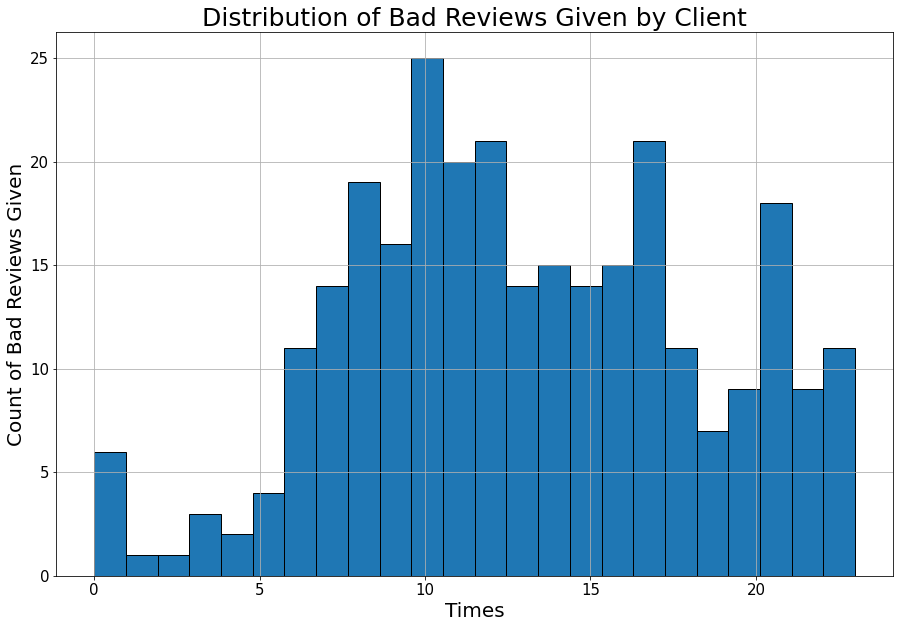

In [66]:
Negative = data_use[(data_use['score']==2)|(data_use['score']==1)]
plt.figure(figsize=(15,10))
Negative['at'].dt.hour.plot(kind='hist',bins=24,ec='black')
plt.grid()
plt.title('Distribution of Bad Reviews Given by Client',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Times',fontsize=20)
plt.ylabel('Count of Bad Reviews Given',fontsize=20);

## Analysis

In thise project I will use three difrent method to analys JAKI reviews section on google play stor:

- CountVectorizer 
- Tfidif
- Logistic Regression

In [67]:
# Translate Model

lg = []

# loop fo every row to generate languages on every row
for i,y in enumerate(data_use['content']):
    lg.append(detect_langs(y))

In [68]:
# took only the value on index 0
lg = [str(l).split(':')[0][1:] for l in lg]

# assigned the language code into new columns name 'lang'
data_use['lang']=lg

# Explore the distribution of language ussage beside english each row
data_use[data_use['lang']!='en']['lang'].value_counts()

id    549
tl     46
sk     40
so     31
da      6
et      6
sl      6
ro      5
lt      5
nl      4
fi      4
hr      4
sw      3
it      3
no      3
af      2
ca      2
pl      2
hu      2
sv      2
es      1
cy      1
fr      1
pt      1
Name: lang, dtype: int64

In [69]:
translator = Translator()

In [71]:
tampung = []
for txt, data in enumerate(data_use.content):
    tampung.append(translator.translate(data,src='id').text)

In [72]:
# assign the tampung variable to dataframe call 'english'
data_use['english']=pd.DataFrame(tampung)
data_use

,index,userName,content,score,thumbsUpCount,at,token,stem,stopwords_remove,content_len,word_count,time,pm/am,lang,english
0,314,muhammad arief,aplikasi inovatif besutan gub anies emang keren hasil kolaborasi jadi mempermudah warga jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,2022-12-30 10:09:13,"[aplikasi, inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, jadi, mempermudah, warga, jakarta, berkomunikasi, kepada, pemerintah, provinsi, permasalahannya, saya, harap, 2024, aplikasinya, diangkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, melaporkan, masalah, di, daerahnya]","[aplikasi, inovatif, besut, gub, anies, emang, keren, hasil, kolaborasi, jadi, mudah, warga, jakarta, komunikasi, kepada, perintah, provinsi, masalah, saya, harap, 2024, aplikasi, angkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, lapor, masalah, di, daerah]","[inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, mempermudah, warga, jakarta, berkomunikasi, pemerintah, provinsi, permasalahannya, harap, 2024, aplikasinya, diangkat, tingkat, nasional, rakyat, indonesia, mudah, melaporkan, daerahnya]",289,37,10,AM,id,"This innovative application made by Gub Anies is really cool, the result of collaboration, so it makes it easier for Jakarta residents to communicate with the provincial government about their problems. I hope that in 2024 the application will be raised to the national level so that all Indonesian people can more easily report problems in their regions."
1,315,Anisah Utari,begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu sudah 2 kali lapor tidak juga ada tindaklanjut ini orang orang kerjanya gimana mana dibayar pakai uang pajak rakyat pula aduhhhh,1,1,2022-12-29 18:56:19,"[begitu, lelah, pelaporan, terkait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerjanya, gimana, mana, dibayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[begitu, lelah, lapor, kait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerja, gimana, mana, bayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[lelah, pelaporan, terkait, lampu, jalan, mati, 1, minggu, 2, kali, lapor, tindaklanjut, orang, orang, kerjanya, gimana, dibayar, pakai, uang, pajak, rakyat, aduhhhh]",203,32,18,PM,id,"I'm so tired of reporting about street lights that are out for almost a week, I've reported it twice, there's been no follow-up, how do people get paid for their work using people's tax money, ouchhhh"
2,316,Heru Iswanto,kenapa mau cek pajak kendaraan tidak bisa,5,1,2022-12-29 13:04:20,"[kenapa, mau, cek, pajak, kendaraan, tidak, bisa]","[kenapa, mau, cek, pajak, kendara, tidak, bisa]","[cek, pajak, kendaraan]",41,7,13,PM,id,why can't you check your vehicle tax?
3,317,Arif Rakhman,keren dah ah,5,1,2022-12-28 16:32:23,"[keren, dah, ah]","[keren, dah, ah]","[keren, dah, ah]",12,3,16,PM,id,that's cool
4,318,MDR IDN,sampah auto uninstall,1,1,2022-12-28 08:19:11,"[sampah, auto, uninstall]","[sampah, auto, uninstall]","[sampah, auto, uninstall]",23,3,8,AM,id,auto uninstall trash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,1044,Jandrylus 4,scan barcode kolaborasi pedulilindungi tidak bisa digunakan untuk versi terbaru di perangkat xiaomi reddmi 4 prime padahal scan langsung aplikasi lain yg berkolaborasi dengan peduli lindungi bisa tolong tindak lanjut kalo saya uninstall aja kalo gak bisa dipakai,1,21,2022-01-04 19:16:13,"[scan, barcode, kolaborasi, pedulilindungi, tidak, bisa, digunakan, untuk, versi, terbaru, di, perangkat, xiaomi, reddmi, 4, prime, padahal, scan, langsung, aplikasi, lain, yg, berkolaborasi, dengan, peduli, lindungi, bisa, tolong, tindak, lanjut, ka

In [73]:
# Clean the data again with cas_folding function we already create before
case_folding(data_use,'english')
data_use

,index,userName,content,score,thumbsUpCount,at,token,stem,stopwords_remove,content_len,word_count,time,pm/am,lang,english
0,314,muhammad arief,aplikasi inovatif besutan gub anies emang keren hasil kolaborasi jadi mempermudah warga jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,2022-12-30 10:09:13,"[aplikasi, inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, jadi, mempermudah, warga, jakarta, berkomunikasi, kepada, pemerintah, provinsi, permasalahannya, saya, harap, 2024, aplikasinya, diangkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, melaporkan, masalah, di, daerahnya]","[aplikasi, inovatif, besut, gub, anies, emang, keren, hasil, kolaborasi, jadi, mudah, warga, jakarta, komunikasi, kepada, perintah, provinsi, masalah, saya, harap, 2024, aplikasi, angkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, lapor, masalah, di, daerah]","[inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, mempermudah, warga, jakarta, berkomunikasi, pemerintah, provinsi, permasalahannya, harap, 2024, aplikasinya, diangkat, tingkat, nasional, rakyat, indonesia, mudah, melaporkan, daerahnya]",289,37,10,AM,id,this innovative application made by gub anies is really cool the result of collaboration so it makes it easier for jakarta residents to communicate with the provincial government about their problems i hope that in 2024 the application will be raised to the national level so that all indonesian people can more easily report problems in their regions
1,315,Anisah Utari,begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu sudah 2 kali lapor tidak juga ada tindaklanjut ini orang orang kerjanya gimana mana dibayar pakai uang pajak rakyat pula aduhhhh,1,1,2022-12-29 18:56:19,"[begitu, lelah, pelaporan, terkait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerjanya, gimana, mana, dibayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[begitu, lelah, lapor, kait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerja, gimana, mana, bayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[lelah, pelaporan, terkait, lampu, jalan, mati, 1, minggu, 2, kali, lapor, tindaklanjut, orang, orang, kerjanya, gimana, dibayar, pakai, uang, pajak, rakyat, aduhhhh]",203,32,18,PM,id,i m so tired of reporting about street lights that are out for almost a week i ve reported it twice there s been no follow up how do people get paid for their work using people s tax money ouchhhh
2,316,Heru Iswanto,kenapa mau cek pajak kendaraan tidak bisa,5,1,2022-12-29 13:04:20,"[kenapa, mau, cek, pajak, kendaraan, tidak, bisa]","[kenapa, mau, cek, pajak, kendara, tidak, bisa]","[cek, pajak, kendaraan]",41,7,13,PM,id,why can t you check your vehicle tax
3,317,Arif Rakhman,keren dah ah,5,1,2022-12-28 16:32:23,"[keren, dah, ah]","[keren, dah, ah]","[keren, dah, ah]",12,3,16,PM,id,that s cool
4,318,MDR IDN,sampah auto uninstall,1,1,2022-12-28 08:19:11,"[sampah, auto, uninstall]","[sampah, auto, uninstall]","[sampah, auto, uninstall]",23,3,8,AM,id,auto uninstall trash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,1044,Jandrylus 4,scan barcode kolaborasi pedulilindungi tidak bisa digunakan untuk versi terbaru di perangkat xiaomi reddmi 4 prime padahal scan langsung aplikasi lain yg berkolaborasi dengan peduli lindungi bisa tolong tindak lanjut kalo saya uninstall aja kalo gak bisa dipakai,1,21,2022-01-04 19:16:13,"[scan, barcode, kolaborasi, pedulilindungi, tidak, bisa, digunakan, untuk, versi, terbaru, di, perangkat, xiaomi, reddmi, 4, prime, padahal, scan, langsung, aplikasi, lain, yg, berkolaborasi, dengan, peduli, lindungi, bisa, tolong, tindak, lanjut, kalo, saya, uni

###### Create  Variable y

In [74]:
# explore the data with 'score' equal to 3
# assume that the reviews are truly neutral and doesn't has sentiment
data_use[data_use['score']==3]['score'].count()/data_use.shape[0]*100

6.802721088435375

###### the neutral score has 6.8%, it is a huge number so we explore more throught the data

In [75]:
# Even thought the data had 'score' equale to 3, the review the cust give are more likely a bad reviews.
data_use[data_use['score']==3]

,index,userName,content,score,thumbsUpCount,at,token,stem,stopwords_remove,content_len,word_count,time,pm/am,lang,english
25,339,Fikry Dwi Putra,min kenapa tidak bisa login dengan gmail hanya muncul bacaan harap tunggu sampai akhirnya eror,3,0,2022-12-13 19:15:39,"[min, kenapa, tidak, bisa, login, dengan, gmail, hanya, muncul, bacaan, harap, tunggu, sampai, akhirnya, eror]","[min, kenapa, tidak, bisa, login, dengan, gmail, hanya, muncul, baca, harap, tunggu, sampai, akhir, eror]","[min, login, gmail, muncul, bacaan, harap, tunggu, eror]",96,15,19,PM,id,min why can t i log in with gmail it just says please wait until it finally gets an error
38,352,rafif alfarizi,apk ny bagus cuma knp sllu pas buka dbilang sllu salah kode pas login ud brp x sya buat msh bgtu2 aja pdhl benar loh paswordny dan kl bs pengaduan kita jgn dberi tahu kpd siapapun biar tdk salah paham tau malah smkin sombong warga yang melanggar trima ksih,3,0,2022-12-01 16:05:38,"[apk, ny, bagus, cuma, knp, sllu, pas, buka, dbilang, sllu, salah, kode, pas, login, ud, brp, x, sya, buat, msh, bgtu2, aja, pdhl, benar, loh, paswordny, dan, kl, bs, pengaduan, kita, jgn, dberi, tahu, kpd, siapapun, biar, tdk, salah, paham, tau, malah, smkin, sombong, warga, yang, melanggar, trima, ksih]","[apk, ny, bagus, cuma, knp, sllu, pas, buka, dbilang, sllu, salah, kode, pas, login, ud, brp, x, sya, buat, msh, bgtu2, aja, pdhl, benar, loh, paswordny, dan, kl, bs, adu, kita, jgn, dberi, tahu, kpd, siapa, biar, tdk, salah, paham, tau, malah, smkin, sombong, warga, yang, langgar, trima, ksih]","[apk, ny, bagus, knp, sllu, buka, dbilang, sllu, salah, kode, login, ud, brp, x, sya, msh, bgtu2, pdhl, loh, paswordny, kl, bs, pengaduan, jgn, dberi, kpd, biar, tdk, salah, paham, tau, smkin, sombong, warga, melanggar, trima, ksih]",259,49,16,PM,id,the apk is good but why does it always stop when i open it and it says it s always the wrong code when i log in how much is it but i still make it just like that even though the password is correct and if you can complain don t tell anyone so they don t get the wrong idea you know it makes the people who violate it even more arrogant thank you
47,361,19 Muhammad Fauzi Oetomo 23,3 dulu nnti klo good tmbah lgi 1,3,0,2022-11-19 17:52:17,"[3, dulu, nnti, klo, good, tmbah, lgi, 1]","[3, dulu, nnti, klo, good, tmbah, lgi, 1]","[3, nnti, klo, good, tmbah, lgi, 1]",32,8,17,PM,so,3 first then if it s good add another 1
50,364,Hafid Zuan,uuh,3,0,2022-11-17 07:05:18,[uuh],[uuh],[uuh],3,1,7,AM,so,ugh
62,376,Muhaimin Muhaimin,mau daftar vaksin kapan bukanya,3,0,2022-11-06 00:45:49,"[mau, daftar, vaksin, kapan, bukanya]","[mau, daftar, vaksin, kapan, buka]","[daftar, vaksin, bukanya]",31,5,0,AM,id,when do you want to register for the vaccine
63,377,Lia Hermawan,ini knapa pdhal email user sama password nya benar tapi ga bisa daftar katanya ga sesuai,3,1,2022-11-05 11:18:47,"[ini, knapa, pdhal, email, user, sama, password, nya, benar, tapi, ga, bisa, daftar, katanya, ga, sesuai]","[ini, knapa, pdhal, email, user, sama, password, nya, benar, tapi, ga, bisa, daftar, kata, ga, sesuai]","[knapa, pdhal, email, user, password, daftar, sesuai]",88,16,11,AM,id,why is this even though the user s email and password are correct but they can t register they say it doesn t match
73,387,Fitri Ariella,tidak tertangani dengan baik dan bahkan belum dibereskan tapi laporan sudah dianggap selesai oleh biro pemerintahan,3,1,2022-10-26 10:06:40,"[tidak, tertangani, dengan, baik, dan, bahkan, belum, dibereskan, tapi, laporan, sudah, dianggap, selesai, oleh, biro, pemerintahan]","[tidak, tangan, dengan, baik, dan, bahkan, belum, beres, tapi, lapor, sudah, anggap, selesai, oleh, biro, perintah]","[tertangani, dibereskan, laporan, dianggap, selesai, biro, pemerintahan]",116,16,10,AM,id,not handled properly and has not even been resolved but the report has been considered complete by the government bureau
117,431,POCHI CAT,nih yang bikin aplikasi di sekolah gw,3,0,2022-10-12 10:40:27,"[nih, ya

### Explore neutral score (3)

After explore it, we can see that the reviews with score 3 are mostly complaining the system or more likely to be a negative reviews, afterward we assing the ratings with score 3 is a negative reviews

In [76]:
#Create an empty list to assign the value
var_y = []

# Create a loop to transform the 'score' data from 4,5 to 1 and 3,2,1 to 0
for y,i in enumerate(data_use['score']):
    if i == 4 or i == 5:
        var_y.append(1)
    else:
        var_y.append(0)
print(var_y)

[1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 

In [77]:
data_use['var_y']=pd.DataFrame(var_y)
data_use

,index,userName,content,score,thumbsUpCount,at,token,stem,stopwords_remove,content_len,word_count,time,pm/am,lang,english,var_y
0,314,muhammad arief,aplikasi inovatif besutan gub anies emang keren hasil kolaborasi jadi mempermudah warga jakarta berkomunikasi kepada pemerintah provinsi permasalahannya saya harap 2024 aplikasinya diangkat ke tingkat nasional agar seluruh rakyat indonesia dapat lebih mudah melaporkan masalah di daerahnya,5,0,2022-12-30 10:09:13,"[aplikasi, inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, jadi, mempermudah, warga, jakarta, berkomunikasi, kepada, pemerintah, provinsi, permasalahannya, saya, harap, 2024, aplikasinya, diangkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, melaporkan, masalah, di, daerahnya]","[aplikasi, inovatif, besut, gub, anies, emang, keren, hasil, kolaborasi, jadi, mudah, warga, jakarta, komunikasi, kepada, perintah, provinsi, masalah, saya, harap, 2024, aplikasi, angkat, ke, tingkat, nasional, agar, seluruh, rakyat, indonesia, dapat, lebih, mudah, lapor, masalah, di, daerah]","[inovatif, besutan, gub, anies, emang, keren, hasil, kolaborasi, mempermudah, warga, jakarta, berkomunikasi, pemerintah, provinsi, permasalahannya, harap, 2024, aplikasinya, diangkat, tingkat, nasional, rakyat, indonesia, mudah, melaporkan, daerahnya]",289,37,10,AM,id,this innovative application made by gub anies is really cool the result of collaboration so it makes it easier for jakarta residents to communicate with the provincial government about their problems i hope that in 2024 the application will be raised to the national level so that all indonesian people can more easily report problems in their regions,1
1,315,Anisah Utari,begitu lelah pelaporan terkait lampu jalan yang mati hampir 1 minggu sudah 2 kali lapor tidak juga ada tindaklanjut ini orang orang kerjanya gimana mana dibayar pakai uang pajak rakyat pula aduhhhh,1,1,2022-12-29 18:56:19,"[begitu, lelah, pelaporan, terkait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerjanya, gimana, mana, dibayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[begitu, lelah, lapor, kait, lampu, jalan, yang, mati, hampir, 1, minggu, sudah, 2, kali, lapor, tidak, juga, ada, tindaklanjut, ini, orang, orang, kerja, gimana, mana, bayar, pakai, uang, pajak, rakyat, pula, aduhhhh]","[lelah, pelaporan, terkait, lampu, jalan, mati, 1, minggu, 2, kali, lapor, tindaklanjut, orang, orang, kerjanya, gimana, dibayar, pakai, uang, pajak, rakyat, aduhhhh]",203,32,18,PM,id,i m so tired of reporting about street lights that are out for almost a week i ve reported it twice there s been no follow up how do people get paid for their work using people s tax money ouchhhh,0
2,316,Heru Iswanto,kenapa mau cek pajak kendaraan tidak bisa,5,1,2022-12-29 13:04:20,"[kenapa, mau, cek, pajak, kendaraan, tidak, bisa]","[kenapa, mau, cek, pajak, kendara, tidak, bisa]","[cek, pajak, kendaraan]",41,7,13,PM,id,why can t you check your vehicle tax,1
3,317,Arif Rakhman,keren dah ah,5,1,2022-12-28 16:32:23,"[keren, dah, ah]","[keren, dah, ah]","[keren, dah, ah]",12,3,16,PM,id,that s cool,1
4,318,MDR IDN,sampah auto uninstall,1,1,2022-12-28 08:19:11,"[sampah, auto, uninstall]","[sampah, auto, uninstall]","[sampah, auto, uninstall]",23,3,8,AM,id,auto uninstall trash,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,1044,Jandrylus 4,scan barcode kolaborasi pedulilindungi tidak bisa digunakan untuk versi terbaru di perangkat xiaomi reddmi 4 prime padahal scan langsung aplikasi lain yg berkolaborasi dengan peduli lindungi bisa tolong tindak lanjut kalo saya uninstall aja kalo gak bisa dipakai,1,21,2022-01-04 19:16:13,"[scan, barcode, kolaborasi, pedulilindungi, tidak, bisa, digunakan, untuk, versi, terbaru, di, perangkat, xiaomi, reddmi, 4, prime, padahal, scan, langsung, aplikasi, lain, yg, berkolaborasi, dengan, peduli, lindungi, bisa, tolong, tindak, lan

# 4. Build Prediction
---

##### Logistic regression

on logistic regression, this project will devided the sentiment into two categories;

  - `bankrupt = 0` for the bad reviews.
  - `bankrupt = 1` for the good reviews.
  
those categories are classified with `score` columns, when the score is 4 or 5 then sentiment would be good otherwise sentiment would be bad

##### K-Nearest Neighboor

With KNN approach, we doesn't transform the y variable, we keep the score to has 5 value. 

##### Support Vector Machine
With SVM approach, we doesn't transform the y variable, we keep the score to has 5 value. 
  

### Logistic Regression

In [78]:
# Remove stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['jaki'])

In [79]:
# create a numeric value from 'english' columns with bag of word method
cv =CountVectorizer(stop_words=my_stop_words,ngram_range=(1, 2),token_pattern=r'\b[^\d\W][^\d\W]+\b')
X1 = cv.fit_transform(data_use.english).toarray()

In [80]:
# create a numeric value from 'english' columns with Tfidf method
tfidf = TfidfVectorizer(stop_words=my_stop_words, ngram_range=(1, 2),token_pattern=r'\b[^\d\W][^\d\W]+\b')
X2 = tfidf.fit_transform(data_use.english).toarray()

In [81]:
# assing 'var_y' to y
y = data_use.var_y

<AxesSubplot:>

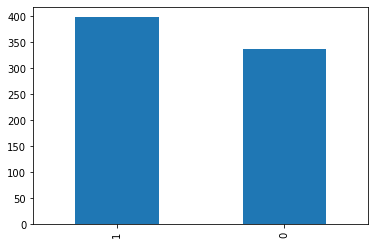

In [82]:
# Check imbalance data
data_use['var_y'].value_counts().plot(kind='bar')

Data doesn't look have a big different. so we okkay with it

## Logistic Regression with BOW

In [83]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X1, y, test_size=0.2, random_state=42,stratify=y)

In [84]:
log_reg_bow = LogisticRegression()
log_reg_bow.fit(X_train_bow,y_train_bow)
print('Accuracy on train set: ', log_reg_bow.score(X_train_bow,y_train_bow))
print('Accuracy on test set: ', log_reg_bow.score(X_test_bow, y_test_bow))

Accuracy on train set:  0.9761904761904762
Accuracy on test set:  0.8843537414965986


In [85]:
y_predict_bow = log_reg_bow.predict(X_test_bow)
print('Accuracy of logistic regression: ', accuracy_score(y_test_bow, y_predict_bow))

Accuracy of logistic regression:  0.8843537414965986


              precision    recall  f1-score   support

           0       0.88      0.87      0.87        67
           1       0.89      0.90      0.89        80

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



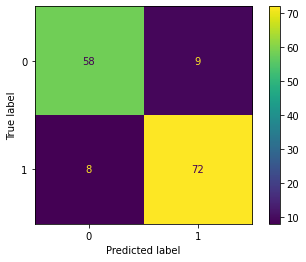

In [86]:
print(classification_report(y_test_bow, y_predict_bow))
plot_confusion_matrix(log_reg_bow, X_test_bow, y_test_bow)
plt.grid(False)

In [87]:
from plot_metric.functions import BinaryClassification

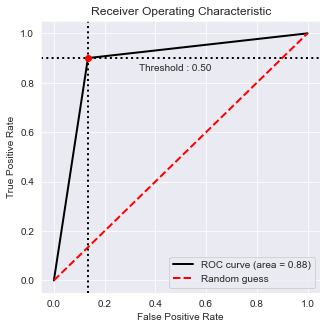

In [88]:
bc = BinaryClassification(y_test_bow, y_predict_bow, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Logistic Regression with Tfidf

In [89]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X2, y, test_size=0.2, random_state=42,stratify=y)

In [90]:
log_reg_tfidf = LogisticRegression().fit(X_train_tfidf,y_train_tfidf)
print('Accuracy on train set: ', log_reg_tfidf.score(X_train_tfidf,y_train_tfidf))
print('Accuracy on test set: ', log_reg_tfidf.score(X_test_tfidf, y_test_tfidf))

Accuracy on train set:  0.967687074829932
Accuracy on test set:  0.8707482993197279


In [91]:
y_predict_tfidf = log_reg_tfidf.predict(X_test_tfidf)
print('Accuracy of logistic regression: ', accuracy_score(y_test_tfidf, y_predict_tfidf))

Accuracy of logistic regression:  0.8707482993197279


              precision    recall  f1-score   support

           0       0.79      0.97      0.87        67
           1       0.97      0.79      0.87        80

    accuracy                           0.87       147
   macro avg       0.88      0.88      0.87       147
weighted avg       0.89      0.87      0.87       147



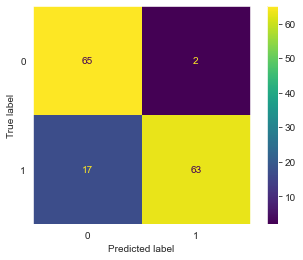

In [92]:
print(classification_report(y_test_tfidf, y_predict_tfidf))
plot_confusion_matrix(log_reg_tfidf, X_test_tfidf, y_test_tfidf)
plt.grid(False)

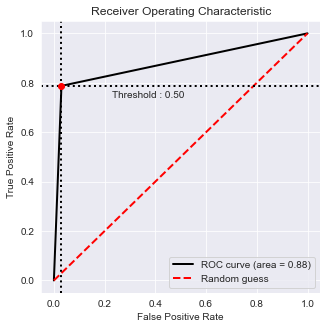

In [93]:
bc = BinaryClassification(y_test_tfidf, y_predict_tfidf, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### KNN & SVM BOW

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [95]:
y_knn=data_use.score

In [96]:
y_knn

0      5
1      1
2      5
3      5
4      1
      ..
730    1
731    1
732    2
733    5
734    1
Name: score, Length: 735, dtype: int64

In [97]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X1, y_knn, test_size=0.2, random_state=42,stratify=y)

In [98]:
print(X_train_knn.shape)
print(X_test_knn.shape)
print(y_train_knn.shape)
print(y_test_knn.shape)

(588, 5486)
(147, 5486)
(588,)
(147,)


In [99]:
knn = KNeighborsClassifier()

In [100]:
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier()

In [101]:
print('Accuracy on train set: ', knn.score(X_train_knn,y_train_knn))
print('Accuracy on test set: ', knn.score(X_test_knn, y_test_knn))

Accuracy on train set:  0.6615646258503401
Accuracy on test set:  0.5578231292517006


In [102]:
y_predict_knn = knn.predict(X_test_knn)
print('Accuracy of logistic regression: ', accuracy_score(y_test_knn, y_predict_knn))

Accuracy of logistic regression:  0.5578231292517006


In [103]:
svm = SVC()

In [104]:
svm.fit(X_train_knn,y_train_knn)

SVC()

In [105]:
print('Accuracy on train set: ', svm.score(X_train_knn,y_train_knn))
print('Accuracy on test set: ', svm.score(X_test_knn, y_test_knn))

Accuracy on train set:  0.8605442176870748
Accuracy on test set:  0.6122448979591837


In [106]:
y_predict_svm = svm.predict(X_test_knn)
print('Accuracy of logistic regression: ', accuracy_score(y_test_knn, y_predict_knn))

Accuracy of logistic regression:  0.5578231292517006


### KNN & SVM Tfidf

In [107]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X2, y_knn, test_size=0.2, random_state=42,stratify=y)

#### KNN

In [108]:
print('Accuracy on train set Knn tfidf: ', knn.score(X_train_tfidf,y_train_tfidf))
print('Accuracy on test set knn tfidf: ', knn.score(X_test_tfidf, y_test_tfidf))

Accuracy on train set Knn tfidf:  0.5017006802721088
Accuracy on test set knn tfidf:  0.5170068027210885


In [109]:
y_predict_tfidf = knn.predict(X_test_tfidf)
print('Accuracy of logistic regression: ', accuracy_score(y_test_tfidf, y_predict_tfidf))

Accuracy of logistic regression:  0.5170068027210885


#### SVM

In [110]:
print('Accuracy on train set SVM: ', svm.score(X_train_tfidf,y_train_tfidf))
print('Accuracy on test set SVM: ', svm.score(X_test_tfidf, y_test_tfidf))

Accuracy on train set SVM:  0.48639455782312924
Accuracy on test set SVM:  0.5102040816326531


In [111]:
y_predict_svm = svm.predict(X_test_tfidf)
print('Accuracy of logistic regression SVM: ', accuracy_score(y_test_tfidf, y_predict_tfidf))

Accuracy of logistic regression SVM:  0.5170068027210885


# Conclusion & Test the Machine
---

In [115]:
# Deployment
comment = input('customer comments : ')
comment = emoji.demojize(comment,language='id')
comment = translator.translate(comment,src='id').text
comment= comment.replace('_',' ')
comment = re.sub(r'[^\w\s]+',' ', comment)
comment = comment.lower()
corpus=[comment]
new_x = cv.transform(corpus).toarray()
new_y = log_reg_bow.predict(new_x)
if new_y == 1:
    print('Terimakasih untuk review baik yang telah diberikan, kami akan tetap memberikan pelayanan terbaik untuk setiap warga Jakarta')
else:
    print('Mohon maaf untuk apa yang kamu alami, kami akan memperbaikinya')

customer comments : Kalau boleh jujur, aplikasi ini masih banyak kendala seperti tidak adanya fitur live chat yang dapat merepotkan saya
Mohon maaf untuk apa yang kamu alami, kami akan memperbaikinya


##### Conclusion

Logistic Regression with Bag-of-Words approach are the good method to predict the sentiments on JAKI reviews app